<a href="https://colab.research.google.com/github/taravskayavm/DLS_I/blob/main/week_01_ml_intro/Homework/hw_1_game_of_thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

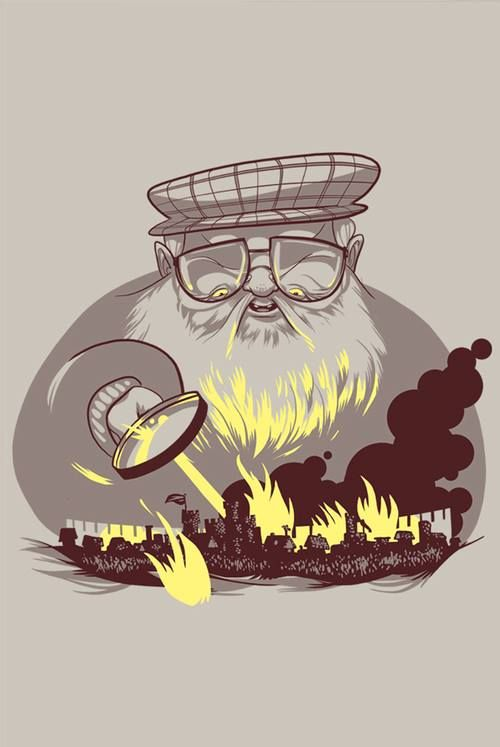

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 22.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 62.1MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [388]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [498]:
data = pd.read_csv('/content/drive/MyDrive/game_of_thrones_train.csv', index_col='S.No')
data.head(5)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [499]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [500]:
data.isnull().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [501]:
data['title'] = data['title'].fillna('Unknown')
data['culture'] = data['culture'].fillna('Unknown')
data['house'] = data['house'].fillna('Unknown')

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [502]:
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
data.drop(columns=['popularity'], inplace=True)

In [503]:
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
data.drop(columns=['numDeadRelations'], inplace=True)

In [504]:
# Проверка результата
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              1557 non-null   object 
 2   male               1557 non-null   int64  
 3   culture            1557 non-null   object 
 4   dateOfBirth        279 non-null    float64
 5   mother             18 non-null     object 
 6   father             22 non-null     object 
 7   heir               21 non-null     object 
 8   house              1557 non-null   object 
 9   spouse             200 non-null    object 
 10  book1              1557 non-null   int64  
 11  book2              1557 non-null   int64  
 12  book3              1557 non-null   int64  
 13  book4              1557 non-null   int64  
 14  book5              1557 non-null   int64  
 15  isAliveMother      18 non-null     float64
 16  isAliveFather      22 non-nul

In [505]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

# Функция для замены значений в culture
def simplify_culture(culture):
    for key, values in cult.items():
        if culture.lower() in values:
            return key
    return culture  # если не найдено, возвращаем оригинальное значение

# Применяем функцию к столбцу culture
data['culture'] = data['culture'].apply(lambda x: simplify_culture(x) if pd.notnull(x) else x)

In [506]:
titles = data['title'].value_counts()
titles.head(15)

,count
title,
Unknown,840
Ser,306
Maester,29
Archmaester,21
Lord,19
Septon,16
Winterfell,15
Lady,10
King in the North,9


In [507]:
# Выбираем титулы, у которых 10 и более представителей
top_titles = ['Unknown', 'Ser', 'Maester', 'Archmaester', 'Lord',
                'Septon', 'Winterfell', 'Lady']

# Применяем группировку
data['title'] = data['title'].apply(lambda x: x if x in top_titles else 'Other')

In [508]:
cultures = data['culture'].value_counts()
cultures.head(15)

,count
culture,
Unknown,1069
Northmen,103
Ironborn,91
Free Folk,56
Braavosi,40
Valyrian,28
Dornish,21
Ghiscari,18
Dothraki,17


In [509]:
# Выбираем культуры, у которых 10 и более представителей
top_cultures = ['Unknown', 'Northmen', 'Ironborn', 'Free Folk', 'Braavosi', 'Valyrian',
                'Dornish', 'Ghiscari', 'Dothraki', 'Westermen', 'Reach',
                'Vale mountain clans', 'Valemen', 'Rivermen']

# Применяем группировку
data['culture'] = data['culture'].apply(lambda x: x if x in top_cultures else 'Other')

In [510]:
houses = data['house'].value_counts()
houses.head(20)

,count
house,
Unknown,381
House Frey,89
Night's Watch,88
House Stark,56
House Targaryen,40
House Lannister,36
House Tyrell,33
House Greyjoy,30
House Osgrey,20


In [511]:
# Выбираем дома, у которых 10 и более представителей
top_houses = ['Unknown', 'House Frey', "'Night's Watch'", 'House Stark', 'House Targaryen', 'House Lannister',
                'House Tyrell', 'House Greyjoy', 'House Osgrey', 'Faith of the Seven', 'House Hightower',
                'House Botley', 'House Arryn', 'House Martell', 'House Crakehall', 'House Florent']

# Применяем группировку
data['house'] = data['house'].apply(lambda x: x if x in top_houses else 'Other')

In [512]:
data.head(5)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Unknown,1,Unknown,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,Unknown,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,0,1,1
2,Walder Frey,Other,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1
3,Addison Hill,Ser,1,Unknown,NaN,NaN,NaN,NaN,Other,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,1,0,0
4,Aemma Arryn,Other,0,Unknown,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0,0
5,Sylva Santagar,Other,0,Dornish,276.0,NaN,NaN,NaN,Other,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,1,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [513]:
data.drop(columns=['name', 'dateOfBirth', 'mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'age'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              1557 non-null   object
 1   male               1557 non-null   int64 
 2   culture            1557 non-null   object
 3   house              1557 non-null   object
 4   book1              1557 non-null   int64 
 5   book2              1557 non-null   int64 
 6   book3              1557 non-null   int64 
 7   book4              1557 non-null   int64 
 8   book5              1557 non-null   int64 
 9   isMarried          1557 non-null   int64 
 10  isNoble            1557 non-null   int64 
 11  isAlive            1557 non-null   int64 
 12  isPopular          1557 non-null   int64 
 13  boolDeadRelations  1557 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 182.5+ KB


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [514]:
data['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


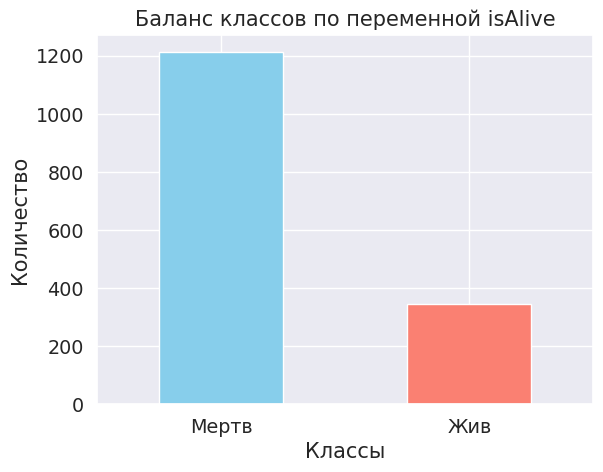

In [515]:
# Баланс классов
data['isAlive'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Баланс классов по переменной isAlive')
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.xticks(ticks=[0, 1], labels=['Мертв', 'Жив'], rotation=0)
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [516]:
from sklearn.preprocessing import OneHotEncoder
import joblib

In [517]:
# Разделение категориальных переменных и других
categorical_columns = ['title', 'culture', 'house']

# Инициализация OneHotEncoder (drop='first' для избежания мультиколлинеарности)
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Преобразование категориальных переменных
encoded_categorical = encoder.fit_transform(data[categorical_columns])

# Создаём DataFrame с закодированными признаками
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Устанавливаем индексы у закодированного DataFrame
encoded_df.index = data.index

# Объединяем оригинальные данные и закодированные переменные
data_encoded = pd.concat([data.drop(categorical_columns, axis=1), encoded_df], axis=1)

# Приводим все данные в датафрейме к типу int
data_encoded = data_encoded.astype(int)

# Сохраняем обученный OneHotEncoder
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

In [520]:
data_encoded.head(5)

,male,book1,book2,book3,book4,book5,isMarried,isNoble,isAlive,isPopular,...,house_House Greyjoy,house_House Hightower,house_House Lannister,house_House Martell,house_House Osgrey,house_House Stark,house_House Targaryen,house_House Tyrell,house_Other,house_Unknown
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

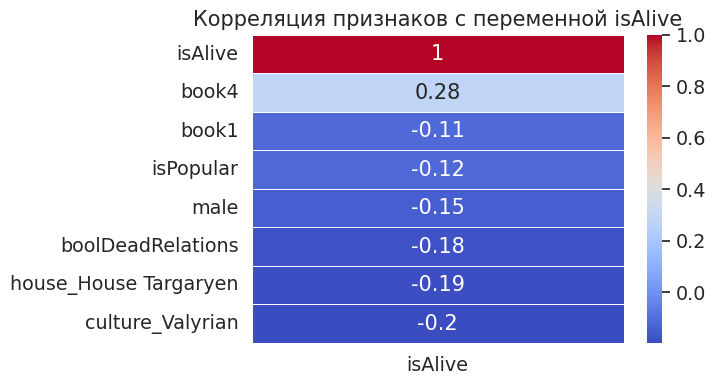

In [521]:
# Рассчитываем корреляцию всех признаков с 'isAlive'
correlation_with_target = data_encoded.corr()['isAlive'].sort_values(ascending=False)

# Отбираем только те признаки, которые имеют значимую корреляцию (например, больше 0.1)
correlation_with_target = correlation_with_target[abs(correlation_with_target) > 0.1]

# Строим тепловую карту
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляция признаков с переменной isAlive')
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [522]:
y = data_encoded['isAlive']
X = data_encoded.drop(columns=['isAlive'])

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [523]:
from sklearn.model_selection import train_test_split

In [524]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [525]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [526]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct, Matern
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import GridSearchCV

In [527]:
# Считываем веса классов для баланса классов в модели
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weight_dict = dict(zip([0, 1], class_weights))

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [528]:
# Шаг 1. создание модели LogisticRegression
logistic_regression = LogisticRegression(class_weight='balanced')

# Шаг 2. обучение модели
# Параметры для поиска
param_grid = {
    'C': [0.1, 1, 10],  # Регуляризация
    'solver': ['lbfgs', 'liblinear'],  # Алгоритмы оптимизации
    'max_iter': [100, 200]  # Максимальное количество итераций
}

# GridSearchCV для подбора гиперпараметров
grid_search_lr = GridSearchCV(logistic_regression, param_grid, cv=3, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры для LogisticRegression:", grid_search_lr.best_params_)

# Обучение модели с оптимальными гиперпараметрами
best_lr = grid_search_lr.best_estimator_

# Шаг 3. Предсказание на тестовых данных
y_pred_lr = best_lr.predict(X_test)

Лучшие параметры для LogisticRegression: {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [529]:
# Шаг 1. создание модели LogisticRegression
random_forest = RandomForestClassifier(class_weight='balanced')

# Шаг 2. обучение модели
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Количество деревьев в лесу
    'max_depth': [None, 10, 20],  # Максимальная глубина деревьев
    'min_samples_split': [2, 5],  # Минимальное количество объектов для разделения узла
}

grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=3, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры для RandomForestClassifier:", grid_search_rf.best_params_)

# Обучение модели с оптимальными гиперпараметрами
best_rf = grid_search_rf.best_estimator_

# Шаг 3. Предсказание на тестовых данных
y_pred_rf = best_rf.predict(X_test)

Лучшие параметры для RandomForestClassifier: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


In [530]:
# Шаг 1. создание модели AdaBoostClassifier
adaboost = AdaBoostClassifier()

# Шаг 2. обучение модели

# Параметры для поиска
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

# GridSearchCV для подбора гиперпараметров
grid_search_adaboost = GridSearchCV(adaboost, param_grid_adaboost, cv=3, n_jobs=-1)
grid_search_adaboost.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры для AdaBoostClassifier:", grid_search_adaboost.best_params_)

# Обучение модели с оптимальными гиперпараметрами
best_adaboost = grid_search_adaboost.best_estimator_

# Шаг 3. Предсказание на тестовых данных
y_pred_adaboost = best_adaboost.predict(X_test)

Лучшие параметры для AdaBoostClassifier: {'learning_rate': 1.0, 'n_estimators': 200}


In [531]:
# Шаг 1. создание модели GaussianProcessClassifier
gaussian_process = GaussianProcessClassifier()

# Шаг 2. Подбор гиперпараметров с помощью GridSearchCV
param_grid_gp = {
    'kernel': [RBF(), DotProduct(), Matern()],  # Используем объекты ядер
    'max_iter_predict': [100, 200],  # Максимальное количество итераций для предсказания
}

grid_search_gp = GridSearchCV(gaussian_process, param_grid_gp, cv=3, n_jobs=-1)
grid_search_gp.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры для GaussianProcessClassifier:", grid_search_gp.best_params_)

# Обучение модели с оптимальными гиперпараметрами
best_gp = grid_search_gp.best_estimator_

# Шаг 3. Предсказание на тестовых данных
y_pred_gp = best_gp.predict(X_test)

Лучшие параметры для GaussianProcessClassifier: {'kernel': RBF(length_scale=1), 'max_iter_predict': 100}


In [532]:
# Шаг 1. создание модели GaussianNB
gnb = GaussianNB()

# Шаг 2. обучение модели
# Параметры для поиска
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# GridSearchCV для подбора гиперпараметров
grid_search_gnb = GridSearchCV(gnb, param_grid_gnb, cv=3, n_jobs=-1)
grid_search_gnb.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры для GaussianNB:", grid_search_gnb.best_params_)

# Обучение модели с оптимальными гиперпараметрами
best_gnb = grid_search_gnb.best_estimator_

# Шаг 3. Предсказание на тестовых данных
y_pred_gnb = best_gnb.predict(X_test)

Лучшие параметры для GaussianNB: {'var_smoothing': 1e-07}


In [533]:
# Шаг 1. создание модели KNeighborsClassifier
knn = KNeighborsClassifier()

# Шаг 2. обучение модели
# Параметры для поиска
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

# GridSearchCV для подбора гиперпараметров
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=3, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры для KNeighborsClassifier:", grid_search_knn.best_params_)

# Обучение модели с оптимальными гиперпараметрами
best_knn = grid_search_knn.best_estimator_

# Шаг 3. Предсказание на тестовых данных
y_pred_knn = best_knn.predict(X_test)

Лучшие параметры для KNeighborsClassifier: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}


In [534]:
# Шаг 1. создание модели SVC
svc = SVC(class_weight='balanced')

# Шаг 2. обучение модели
# Параметры для поиска
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],  # Ядро
    'gamma': ['scale', 'auto'],
}

# GridSearchCV для подбора гиперпараметров
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=3, n_jobs=-1)
grid_search_svc.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры для SVC:", grid_search_svc.best_params_)

# Обучение модели с оптимальными гиперпараметрами
best_svc = grid_search_svc.best_estimator_

# Шаг 3. Предсказание на тестовых данных
y_pred_svc = best_svc.predict(X_test)

Лучшие параметры для SVC: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}


In [535]:
# Шаг 1. создание модели DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(class_weight='balanced')

# Шаг 2. обучение модели
# Параметры для поиска
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# GridSearchCV для подбора гиперпараметров
grid_search_dt = GridSearchCV(decision_tree, param_grid_dt, cv=3, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры для DecisionTreeClassifier:", grid_search_dt.best_params_)

# Обучение модели с оптимальными гиперпараметрами
best_dt = grid_search_dt.best_estimator_

# Шаг 3. Предсказание на тестовых данных
y_pred_dt = best_dt.predict(X_test)

Лучшие параметры для DecisionTreeClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [536]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [537]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy : %.4f" % accuracy_lr)

Logistic Regression Accuracy : 0.6538


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [538]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier : %.4f" % accuracy_rf)

accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("AdaBoost Classifier : %.4f" % accuracy_adaboost)

accuracy_gp = accuracy_score(y_test, y_pred_gp)
print("Gaussian Process Classifier (GPC) : %.4f" % accuracy_gp)

accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Gaussian Naive Bayes (GaussianNB) : %.4f" % accuracy_gnb)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Neighbors Classifier : %.4f" % accuracy_knn)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("C-Support Vector Classification (SVC) : %.4f" % accuracy_svc)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier : %.4f" % accuracy_dt)

Random Forest Classifier : 0.7372
AdaBoost Classifier : 0.7788
Gaussian Process Classifier (GPC) : 0.7756
Gaussian Naive Bayes (GaussianNB) : 0.4295
K-Neighbors Classifier : 0.7724
C-Support Vector Classification (SVC) : 0.6603
Decision Tree Classifier : 0.6859


Выберите лучшую модель.

In [539]:
model_accuracies = {
    'Logistic Regression': 0.6538,
    'Random Forest Classifier': 0.7276,
    'AdaBoost Classifier': 0.7788,
    'Gaussian Process Classifier (GPC)': 0.7756,
    'Gaussian Naive Bayes (GaussianNB)': 0.4295,
    'K-Neighbors Classifier': 0.7724,
    'C-Support Vector Classification (SVC)': 0.6603,
    'Decision Tree Classifier': 0.7019
}

# Находим модель с наивысшей точностью
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model_name]

# Выводим лучшую модель и ее точность
print(f"Лучшая модель: {best_model_name} с точностью {best_accuracy:.4f}")

Лучшая модель: AdaBoost Classifier с точностью 0.7788


In [541]:
# Сохранение лучшей модели
joblib.dump(best_lr, "best_model.pkl")  # замените best_lr на вашу лучшую модель
print("Лучшая модель сохранена в файл best_model.pkl")

Лучшая модель сохранена в файл best_model.pkl


### Применение лучшей модели к тестовым данным

In [569]:
test_data = pd.read_csv("/content/drive/MyDrive/game_of_thrones_test.csv", index_col=['S.No'])
test_data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783


Подготовка тестового датасета

In [570]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              389 non-null    object 
 1   title             221 non-null    object 
 2   male              389 non-null    int64  
 3   culture           189 non-null    object 
 4   dateOfBirth       154 non-null    float64
 5   mother            3 non-null      object 
 6   father            4 non-null      object 
 7   heir              2 non-null      object 
 8   house             343 non-null    object 
 9   spouse            76 non-null     object 
 10  book1             389 non-null    int64  
 11  book2             389 non-null    int64  
 12  book3             389 non-null    int64  
 13  book4             389 non-null    int64  
 14  book5             389 non-null    int64  
 15  isAliveMother     3 non-null      float64
 16  isAliveFather     4 non-null      float64
 17

In [572]:
test_data.drop(columns=['name', 'dateOfBirth', 'mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'age'], inplace=True)
test_data.info()

KeyError: "['name', 'dateOfBirth', 'mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'age'] not found in axis"

In [573]:
test_data['title'] = test_data['title'].fillna('Unknown')
test_data['culture'] = test_data['culture'].fillna('Unknown')
test_data['house'] = test_data['house'].fillna('Unknown')

In [574]:
test_data['isPopular'] = test_data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
test_data.drop(columns=['popularity'], inplace=True)

test_data['boolDeadRelations'] = test_data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
test_data.drop(columns=['numDeadRelations'], inplace=True)

In [575]:
test_data['culture'] = test_data['culture'].apply(lambda x: simplify_culture(x) if pd.notnull(x) else x)
test_data['title'] = test_data['title'].apply(lambda x: x if x in top_titles else 'Other')
test_data['house'] = test_data['house'].apply(lambda x: x if x in top_houses else 'Other')

In [576]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              389 non-null    object
 1   male               389 non-null    int64 
 2   culture            389 non-null    object
 3   house              389 non-null    object
 4   book1              389 non-null    int64 
 5   book2              389 non-null    int64 
 6   book3              389 non-null    int64 
 7   book4              389 non-null    int64 
 8   book5              389 non-null    int64 
 9   isMarried          389 non-null    int64 
 10  isNoble            389 non-null    int64 
 11  isPopular          389 non-null    int64 
 12  boolDeadRelations  389 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 42.5+ KB


In [577]:
# Загружаем обученный OneHotEncoder
encoder = joblib.load("encoder.pkl")  # Замените на путь к вашему файлу

# Преобразование категориальных переменных с handle_unknown='ignore'
encoded_categorical = encoder.transform(test_data[categorical_columns])

# Создаём DataFrame с закодированными признаками
encoded_test_data = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Устанавливаем индексы у закодированного DataFrame
encoded_test_data.index = test_data.index

# Объединяем оригинальные данные и закодированные переменные
encoded_test_data = pd.concat([test_data.drop(categorical_columns, axis=1), encoded_test_data], axis=1)

# Приводим все данные в датафрейме к типу int
encoded_test_data = encoded_test_data.astype(int)

# Сохраняем обученный OneHotEncoder
joblib.dump(encoder, 'encoder.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


['encoder.pkl']

In [578]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   male                         1557 non-null   int64
 1   book1                        1557 non-null   int64
 2   book2                        1557 non-null   int64
 3   book3                        1557 non-null   int64
 4   book4                        1557 non-null   int64
 5   book5                        1557 non-null   int64
 6   isMarried                    1557 non-null   int64
 7   isNoble                      1557 non-null   int64
 8   isAlive                      1557 non-null   int64
 9   isPopular                    1557 non-null   int64
 10  boolDeadRelations            1557 non-null   int64
 11  title_Lady                   1557 non-null   int64
 12  title_Lord                   1557 non-null   int64
 13  title_Maester                1557 non-null   int64
 1

In [579]:
encoded_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   male                         389 non-null    int64
 1   book1                        389 non-null    int64
 2   book2                        389 non-null    int64
 3   book3                        389 non-null    int64
 4   book4                        389 non-null    int64
 5   book5                        389 non-null    int64
 6   isMarried                    389 non-null    int64
 7   isNoble                      389 non-null    int64
 8   isPopular                    389 non-null    int64
 9   boolDeadRelations            389 non-null    int64
 10  title_Lady                   389 non-null    int64
 11  title_Lord                   389 non-null    int64
 12  title_Maester                389 non-null    int64
 13  title_Other                  389 non-null    int64


### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [386]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 7.81MB/s]


In [387]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [389]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)